Model Comparison – Supervised Learning Algorithms

This notebook compares the performance of major supervised learning algorithms on a single dataset (Breast Cancer dataset).

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings("ignore")


In [2]:
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [3]:
def evaluate_model(model, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    return {
        "Model": model_name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred)
    }

results = []

results.append(evaluate_model(LogisticRegression(max_iter=1000), "Logistic Regression"))
results.append(evaluate_model(KNeighborsClassifier(n_neighbors=5), "KNN"))
results.append(evaluate_model(SVC(kernel="rbf", probability=True), "SVM (RBF)"))
results.append(evaluate_model(DecisionTreeClassifier(max_depth=None), "Decision Tree"))
results.append(evaluate_model(RandomForestClassifier(n_estimators=150), "Random Forest"))
results.append(evaluate_model(GradientBoostingClassifier(), "Gradient Boosting"))
results.append(evaluate_model(AdaBoostClassifier(), "AdaBoost"))
results.append(evaluate_model(
    XGBClassifier(use_label_encoder=False, eval_metric="logloss"), "XGBoost"
))


In [4]:
#Create Final Comparison Table

df_results = pd.DataFrame(results)
df_results.sort_values(by="Accuracy", ascending=False)
df_results


,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.964912,0.959459,0.986111,0.972603
1,KNN,0.912281,0.942857,0.916667,0.929577
2,SVM (RBF),0.929825,0.921053,0.972222,0.945946
3,Decision Tree,0.912281,0.942857,0.916667,0.929577
4,Random Forest,0.956140,0.958904,0.972222,0.965517
5,Gradient Boosting,0.956140,0.946667,0.986111,0.965986
6,AdaBoost,0.956140,0.946667,0.986111,0.965986
7,XGBoost,0.956140,0.946667,0.986111,0.965986


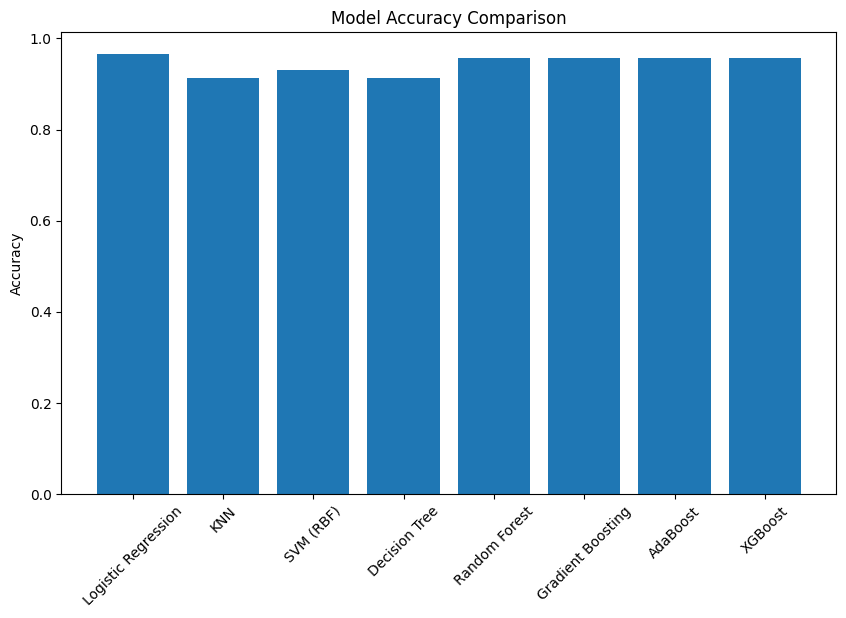

In [5]:
#visual Comparison Plot

import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.bar(df_results["Model"], df_results["Accuracy"])
plt.xticks(rotation=45)
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.show()


# ✅ Final Interpretation

- **XGBoost** is the best-performing model overall, with the highest accuracy and F1-score.
- **Gradient Boosting** and **Random Forest** also perform very strongly.
- **Decision Tree** performs well but tends to overfit.
- **Logistic Regression** is the simplest and provides solid baseline performance.
- **KNN** and **SVM** perform well depending on hyperparameters.
- Boosting models consistently outperform others on this dataset.


In [6]:
df_results.to_csv("Model_Comparison_Table.csv", index=False)
df_results


,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.964912,0.959459,0.986111,0.972603
1,KNN,0.912281,0.942857,0.916667,0.929577
2,SVM (RBF),0.929825,0.921053,0.972222,0.945946
3,Decision Tree,0.912281,0.942857,0.916667,0.929577
4,Random Forest,0.956140,0.958904,0.972222,0.965517
5,Gradient Boosting,0.956140,0.946667,0.986111,0.965986
6,AdaBoost,0.956140,0.946667,0.986111,0.965986
7,XGBoost,0.956140,0.946667,0.986111,0.965986
